# Solução para o problema

Importamos a biblioteca **sklearn** para lidar com as funções de busca em árvore de decisão.

In [33]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris
import pandas

In [214]:
data = pandas.read_csv('reduced_data.csv')
feature_labels = ['hasMerchantAccount', 'simplified_type', 'amount', 'oldbalanceOrg', 
                  'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
x = data[feature_labels]
y = data['isFraud']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
# print(len(x_train))

fraud_transactions = data.loc[data['isFraud'] == 1]
x_fraud_test = fraud_transactions[feature_labels]
y_fraud_test = fraud_transactions['isFraud']

non_fraud_transactions = data.loc[data['isFraud'] == 0]
x_non_fraud_test = non_fraud_transactions[feature_labels]
y_non_fraud_test = non_fraud_transactions['isFraud']

print(len(x_fraud_test))
print(len(x_non_fraud_test))

x_train = x_fraud_test[:4000]
x_train = pandas.concat([x_train, x_non_fraud_test[:12000]])

y_train = y_fraud_test[:4000]
y_train = pandas.concat([y_train, y_non_fraud_test[:12000]])

print(len(x_train))

x_fraud_test = x_fraud_test[4000:]
y_fraud_test = y_fraud_test[4000:]

x_non_fraud_test = x_non_fraud_test[12000:]
y_non_fraud_test = y_non_fraud_test[12000:]

8213
6354407
16000


In [257]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=15)
clf = clf.fit(x_train, y_train)

In [258]:
y_fraud_prediction     = clf.predict(x_fraud_test)
y_non_fraud_prediction = clf.predict(x_non_fraud_test)

In [259]:
print('acurácia fraude: ', metrics.accuracy_score(y_fraud_test, y_fraud_prediction))
print('acurácia não fraude: ', metrics.accuracy_score(y_non_fraud_test, y_non_fraud_prediction))

acurácia fraude:  0.9973890339425587
acurácia não fraude:  0.9808217921051109


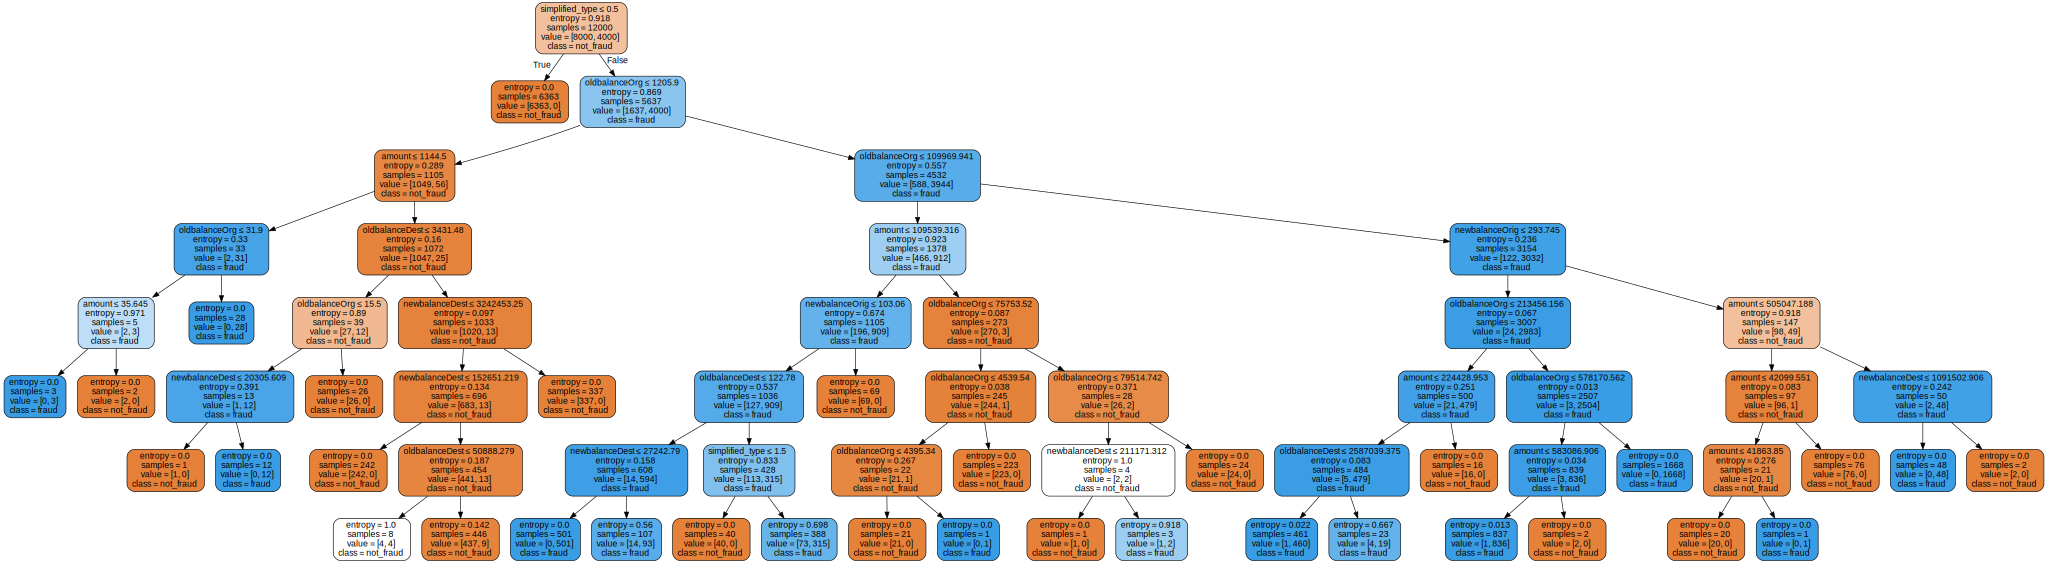

In [194]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_labels, class_names=['not_fraud', 'fraud'], 
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [15]:
clf.predict([[1864.28, 21249.0, 19384.72, 0.0, 0.0, 1, 0]])

C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [10]:
clf.predict([[181.0, 181.0, 0.0, 0.0, 0.0, 0, 1]])

C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)